In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv('iris.csv')
df.head()

,sl,sw,pl,pw,sp
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
scaler = StandardScaler()
scaler.fit(df.drop('sp',axis=1))
scaled_features = scaler.transform(df.drop('sp',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,sl,sw,pl,pw
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [23]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['sp'],
                                                    test_size=0.33)

In [14]:
for seed in range(5):
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['sp'], test_size=0.33, random_state=seed)

    modelall = LinearRegression()
    modelall.fit(X_train, y_train)
    r_sq = modelall.score(X_test, y_test)
    print('coefficient of determination:', r_sq)

coefficient of determination: 0.9033582492295451
coefficient of determination: 0.91384867004318
coefficient of determination: 0.929549334208523
coefficient of determination: 0.9147074148161931
coefficient of determination: 0.938862528483533


In [18]:
accuracy_rate = []
for seed in range(5):
    for i in range(1,21):
        X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['sp'], test_size=0.33, random_state=seed)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        accuracy_rate.append(np.mean(pred_i == y_test))
print (accuracy_rate)
len(accuracy_rate)

[0.94, 0.94, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.92, 0.94, 0.92, 0.92, 0.96, 0.96, 0.98, 0.96, 0.96, 0.98, 0.98, 0.98, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.94, 0.94, 0.96, 0.98, 0.98, 0.98, 0.98, 0.96, 0.98, 0.98, 1.0, 1.0, 1.0, 0.98, 0.98, 0.98, 0.98, 0.98, 0.96, 0.96, 0.96, 0.96, 0.96, 0.9, 0.96, 0.94, 0.92, 0.94, 0.96, 0.96, 0.92, 0.96, 0.92, 0.94, 0.94, 0.94, 0.96, 0.96, 0.94, 0.94, 0.92, 0.94, 0.92, 0.94, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.98]


100

In [24]:
# Choosing K and Accuracy Rate
accuracy_rate = []

for i in range(1,21):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(np.mean(pred_i == y_test))

print( accuracy_rate )

[0.92, 0.92, 0.92, 0.94, 0.94, 0.94, 0.94, 0.94, 0.92, 0.94, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.94]


Text(0, 0.5, 'Accuracy Rate')

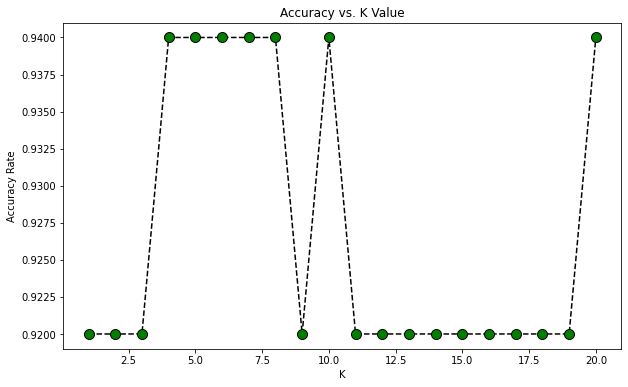

In [25]:
# Line Chart
plt.figure(figsize=(10,6))
plt.plot(range(1,21),accuracy_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
